# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

df = pd.read_csv('demo01.csv')

df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [6]:
df.info

<bound method DataFrame.info of       sexo posse_de_veiculo posse_de_imovel  qtd_filhos            tipo_renda  \
0        M                Y               Y           0               Working   
1        F                N               Y           0  Commercial associate   
2        F                N               Y           0  Commercial associate   
3        M                Y               Y           0               Working   
4        F                Y               N           0               Working   
...    ...              ...             ...         ...                   ...   
16645    F                N               Y           0               Working   
16646    F                N               Y           0  Commercial associate   
16647    M                Y               Y           0               Working   
16648    M                Y               Y           0               Working   
16649    F                N               Y           0             Pensioner

In [7]:
df.columns

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'possui_celular', 'possui_fone_comercial',
       'possui_fone', 'possui_email', 'qt_pessoas_residencia', 'mau'],
      dtype='object')

In [17]:
tipos = df.dtypes
print(tipos)

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object


In [9]:
df.isnull().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [12]:
df_sem_mau = df.drop(['mau'], axis=1)
df_sem_mau.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0


In [15]:
# Distribuição da Variavel Mau

distribuicao_mau = df['mau'].value_counts(normalize=True) * 100

print(distribuicao_mau)

mau
False    97.657658
True      2.342342
Name: proportion, dtype: float64


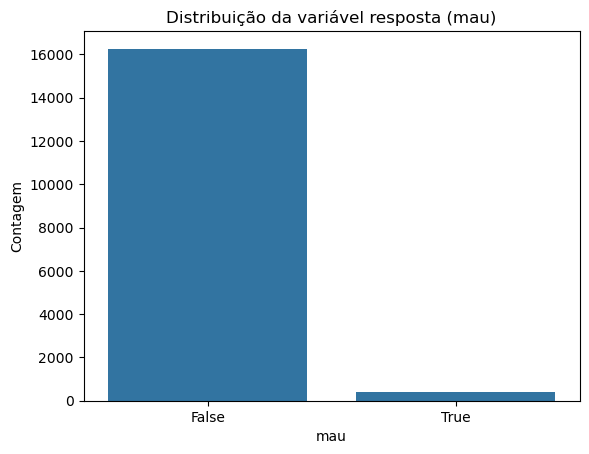

In [16]:
# Visualizando a Distribuição

sns.countplot(data=df, x='mau')

plt.title('Distribuição da variável resposta (mau)')

plt.xlabel('mau')

plt.ylabel('Contagem')

plt.show()

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável.
    Dica:
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis,
        3. conte o número de categorias dessa variável
        4. acumule essa informação de 3. na lista que você criou em 1.
        5. No final, essa lista pode ser atribuída à nossa variável.

In [20]:
# Criando a lista

# Variaveis
nomes = df.columns
tipos = df.dtypes
qtd_categorias = []

# Anexando quantidade de valores únicos à lista
for col in nomes:
    qtd_categorias.append(df[col].nunique())

# Conferindo resultado
print(nomes)
print(qtd_categorias)

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'possui_celular', 'possui_fone_comercial',
       'possui_fone', 'possui_email', 'qt_pessoas_residencia', 'mau'],
      dtype='object')
[2, 2, 2, 8, 5, 5, 5, 6, 5298, 3005, 1, 2, 2, 2, 9, 2]


In [21]:
# Criando DataFrame Metadados

metadados = pd.DataFrame({
    'variavel': nomes,
    'tipo_dado': tipos,
    'qtd_categorias': qtd_categorias
})

# Conferindo resultado

print(metadados)

                                    variavel tipo_dado  qtd_categorias
sexo                                    sexo    object               2
posse_de_veiculo            posse_de_veiculo    object               2
posse_de_imovel              posse_de_imovel    object               2
qtd_filhos                        qtd_filhos     int64               8
tipo_renda                        tipo_renda    object               5
educacao                            educacao    object               5
estado_civil                    estado_civil    object               5
tipo_residencia              tipo_residencia    object               6
idade                                  idade   float64            5298
tempo_emprego                  tempo_emprego   float64            3005
possui_celular                possui_celular     int64               1
possui_fone_comercial  possui_fone_comercial     int64               2
possui_fone                      possui_fone     int64               2
possui

#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [37]:
# Separando variaveis em numéricas e categóricas

variaveis_numericas = df.select_dtypes(include=['int64', 'float64', 'bool'])
variaveis_categoricas = df.select_dtypes(include=['object'])

# Separando as categóricas necessárias das desnecessarias 
## Para quantidades maiores de variaveis, se dtype = 'object' E qtd_categorias <=2 append em uma lista

variaveis_relevantes = variaveis_categoricas.drop(['tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], axis=1)

# Criando os dummies da variaveis categoricas

dummies = pd.get_dummies(variaveis_relevantes)

# Conferindo resultado
dummies.head()

,sexo_F,sexo_M,posse_de_veiculo_N,posse_de_veiculo_Y,posse_de_imovel_N,posse_de_imovel_Y
0,False,True,False,True,False,True
1,True,False,True,False,False,True
2,True,False,True,False,False,True
3,False,True,False,True,False,True
4,True,False,False,True,True,False


In [39]:
# Criando DataFrame para o Scikit-Learn

df_sklearn = pd.concat([variaveis_numericas, dummies], axis=1)

# Conferindo Resultado

print(df_sklearn.head())
print("\nFormato final:", df_sklearn.shape)

   qtd_filhos      idade  tempo_emprego  possui_celular  \
0           0  58.832877       3.106849               1   
1           0  52.356164       8.358904               1   
2           0  52.356164       8.358904               1   
3           0  46.224658       2.106849               1   
4           0  29.230137       3.021918               1   

   possui_fone_comercial  possui_fone  possui_email  qt_pessoas_residencia  \
0                      0            0             0                    2.0   
1                      0            1             1                    1.0   
2                      0            1             1                    1.0   
3                      1            1             1                    2.0   
4                      0            0             0                    2.0   

     mau  sexo_F  sexo_M  posse_de_veiculo_N  posse_de_veiculo_Y  \
0  False   False    True               False                True   
1  False    True   False                

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [41]:
# Tabela cruzada email
tabela_email = pd.crosstab(df['possui_email'], df['mau'], normalize='index') * 100
print("Distribuição do mau por possui_email:\n", tabela_email, "\n")

Distribuição do mau por possui_email:
 mau               False     True 
possui_email                     
0             97.626895  2.373105
1             97.972973  2.027027 



In [42]:
# Tabela cruzada veiculos
tabela_veiculo = pd.crosstab(df['posse_de_veiculo'], df['mau'], normalize='index') * 100
print("Distribuição do mau por posse_de_veiculo:\n", tabela_veiculo, "\n")

Distribuição do mau por posse_de_veiculo:
 mau                   False     True 
posse_de_veiculo                     
N                 97.573197  2.426803
Y                 97.790482  2.209518 



In [60]:
tabela_veiculo.columns

Index([False, True], dtype='bool', name='mau')

In [87]:
# Visualização

# Criando DataFrame dos dois juntos

# Resetando o índice para evitar conflito que estava ocorrendo
tabela_email = tabela_email.reset_index()
tabela_veiculo = tabela_veiculo.reset_index()

# Renomeando as colunas para facilitar o merge
tabela_email.rename(columns={1: 'Taxa mau (possui_email)'}, inplace=True)
tabela_veiculo.rename(columns={1: 'Taxa mau (posse_de_veiculo)'}, inplace=True)


comparativo = pd.DataFrame({
    'Categoria': ['Não possui', 'Possui'],
    'Possui e-mail': tabela_email['Taxa mau (possui_email)'],
    'Posse de veículo': tabela_veiculo['Taxa mau (posse_de_veiculo)']
})

# Conferindo resultado

comparativo.head()

,Categoria,Possui e-mail,Posse de veículo
0,Não possui,2.373105,2.426803
1,Possui,2.027027,2.209518


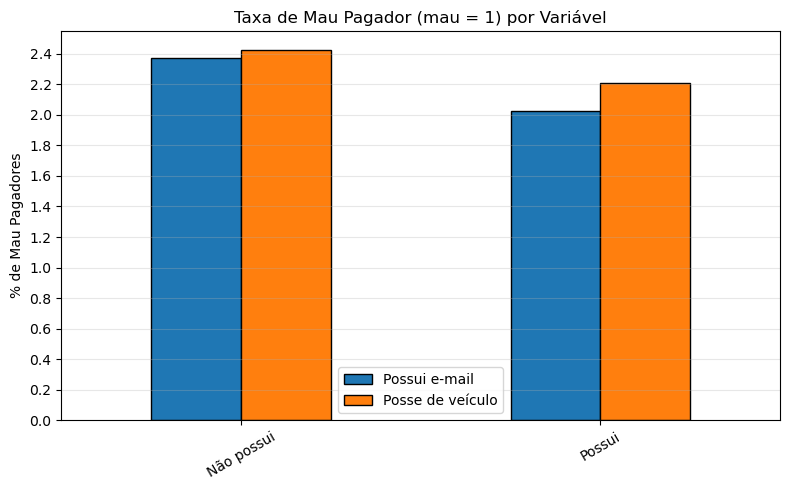

In [107]:
# Visualização

# Atribuição
ax = comparativo.set_index('Categoria')[['Possui e-mail', 'Posse de veículo']].plot(
    kind='bar', figsize=(8,5), edgecolor='black'
)

# Aumentando a quantidade de divisões no eixo Y
ax.yaxis.set_major_locator(MultipleLocator(0.2))  # 5 em 5%

# Plotagem
plt.title('Taxa de Mau Pagador (mau = 1) por Variável')
plt.ylabel('% de Mau Pagadores')
plt.xlabel('')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

#### R: É possivel então concluir que Posse de Veículo explica melhor a ocorrencia de Default



#####

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [108]:
# Salvabdi base de dados

df_sklearn.to_csv('df_sklearn.csv', index=False)